# SIMPLE LINEAR REGRESSION - FUEL CONSUMPTION


By Srushti Shimpi

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline
import sklearn
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

## Reading the data

In [3]:
data = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Data Exploration

In [4]:
data.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


## Creating new data, including few columns from previous data

In [5]:
rdf = data[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','CO2EMISSIONS']]
rdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,CO2EMISSIONS
0,2.0,4,8.5,9.9,6.7,196
1,2.4,4,9.6,11.2,7.7,221
2,1.5,4,5.9,6.0,5.8,136
3,3.5,6,11.1,12.7,9.1,255
4,3.5,6,10.6,12.1,8.7,244


## Histogram for all the features of the fuel consumption

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001239DD5C978>]],
      dtype=object)

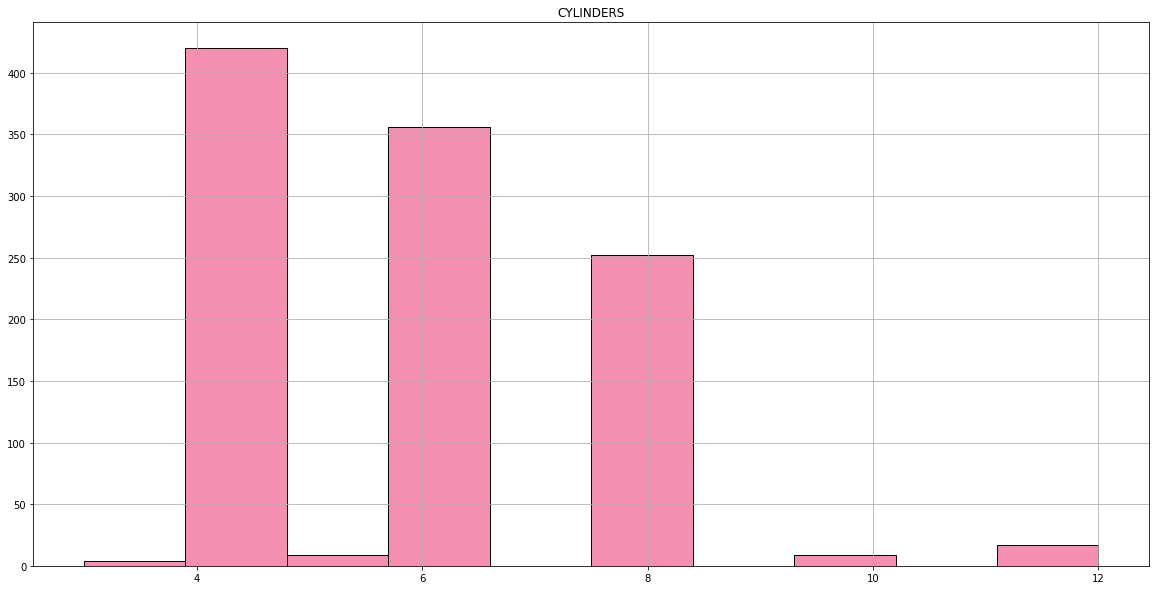

In [6]:
h = rdf[['CYLINDERS']]
h.hist(color='#F48FB1', figsize = (20,10), edgecolor='black')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001239E48C160>]],
      dtype=object)

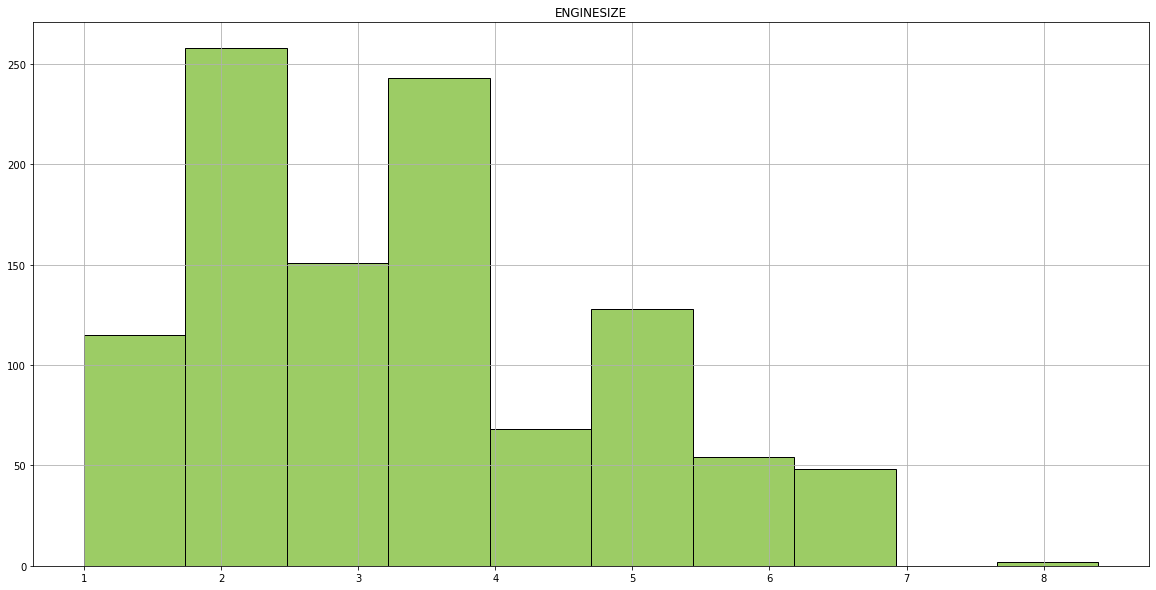

In [7]:

i = rdf[['ENGINESIZE']]
i.hist(color='#9CCC65', figsize = (20,10), edgecolor='black')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001239E0AEF60>]],
      dtype=object)

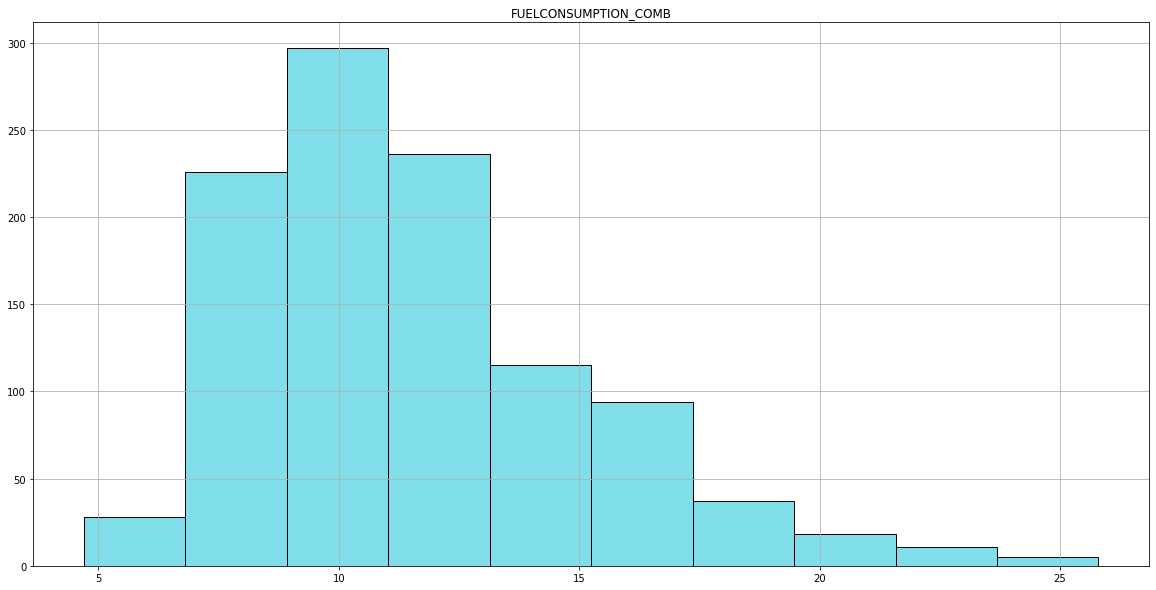

In [8]:
j = rdf[['FUELCONSUMPTION_COMB']]
j.hist(color='#80DEEA', figsize = (20,10), edgecolor='black')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001239E462A58>]],
      dtype=object)

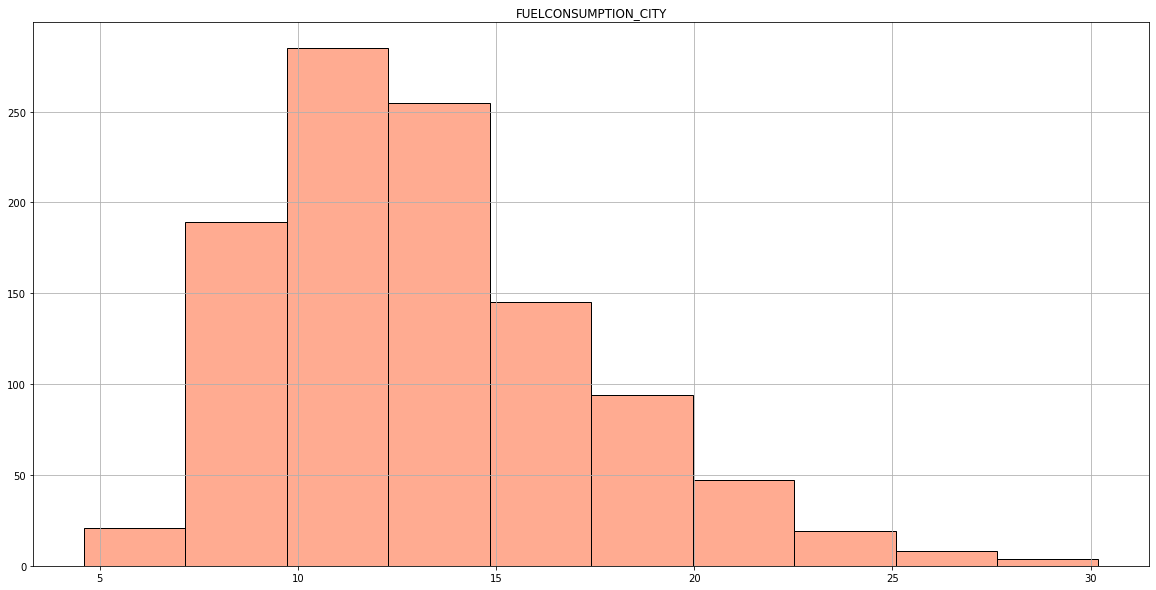

In [9]:
l = rdf[['FUELCONSUMPTION_CITY']]
l.hist(color='#FFAB91', figsize = (20,10), edgecolor='black')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001239EE3CEB8>]],
      dtype=object)

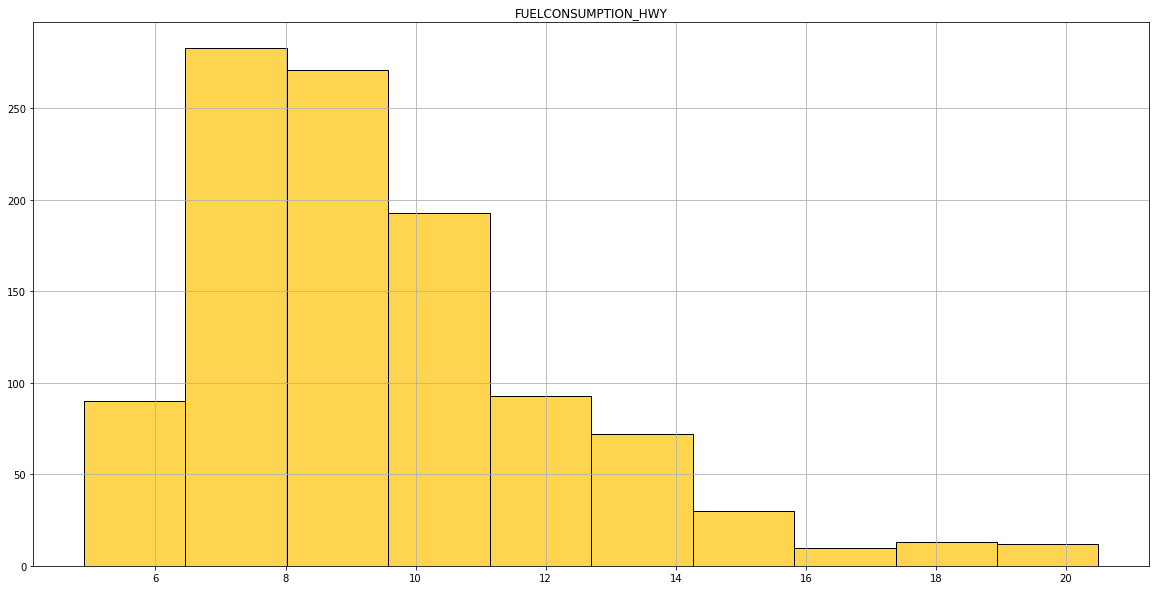

In [10]:
m = rdf[['FUELCONSUMPTION_HWY']]
m.hist(color='#FFD54F', figsize = (20,10), edgecolor='black')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001239E7D1668>]],
      dtype=object)

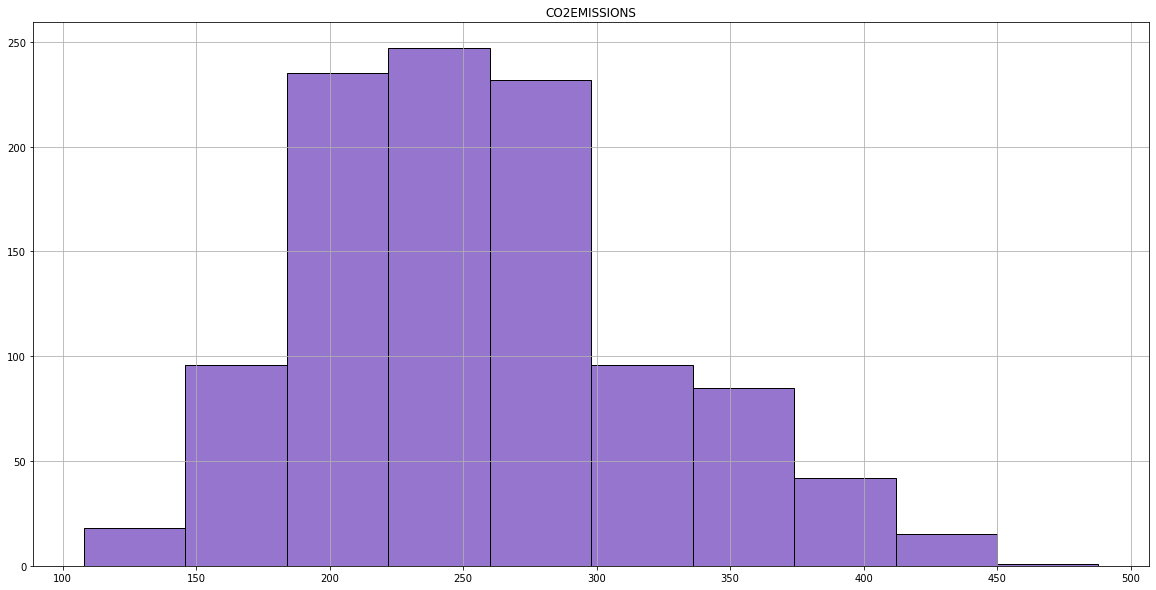

In [11]:
k = rdf[['CO2EMISSIONS']]
k.hist(color='#9575CD', figsize = (20,10), edgecolor='black')


## Scatter Plot

### 1) Engine Size VS CO2 Emission

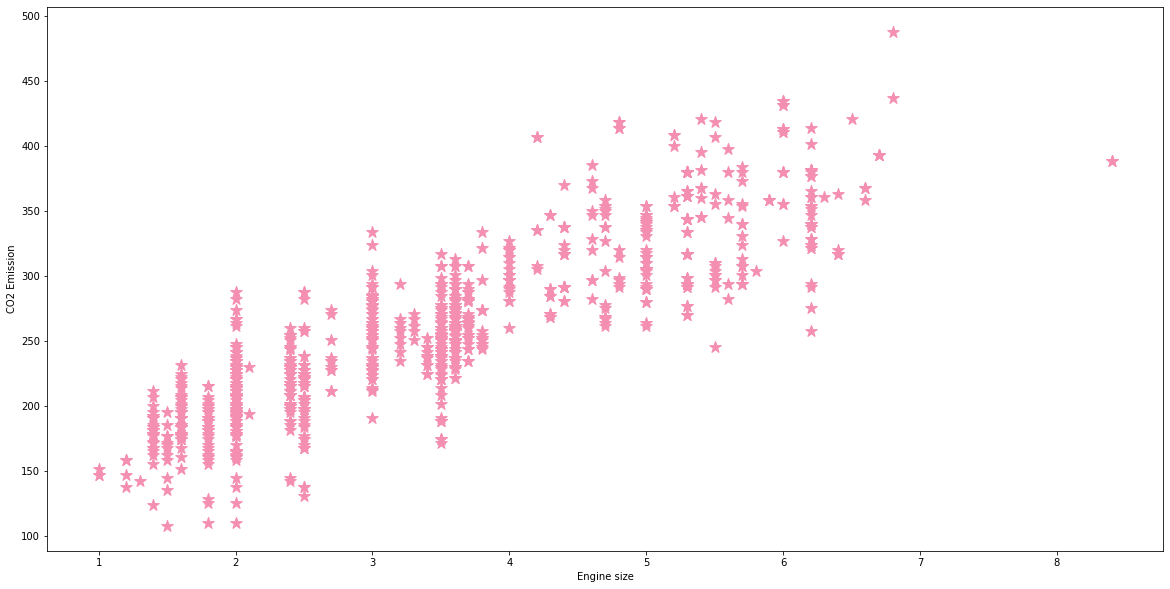

In [12]:
plt.figure(figsize=(20,10))
plt.scatter(rdf.ENGINESIZE, rdf.CO2EMISSIONS,  color='#F48FB1', marker='*', s = 150)
plt.xlabel("Engine size")
plt.ylabel("CO2 Emission")
plt.show()

### 2) Cylinders VS CO2 Emission

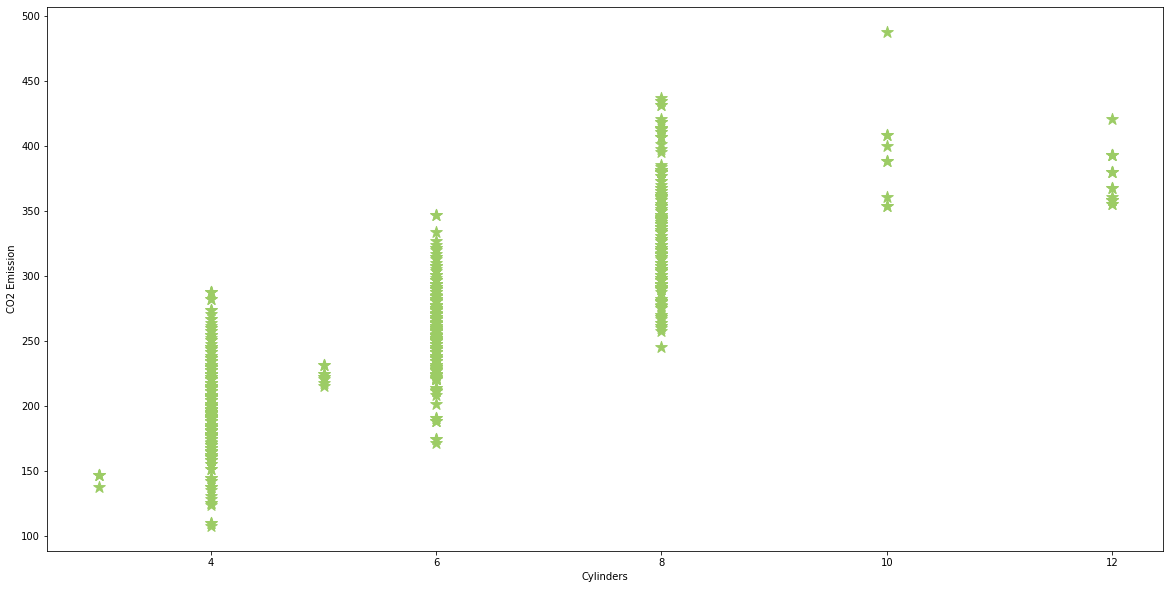

In [13]:
plt.figure(figsize=(20,10))
plt.scatter(rdf.CYLINDERS, rdf.CO2EMISSIONS,  color='#9CCC65',  marker='*', s = 150)
plt.xlabel("Cylinders")
plt.ylabel("CO2 Emission")
plt.show()

### 3) Fuel Consumption Comb VS CO2 Emission

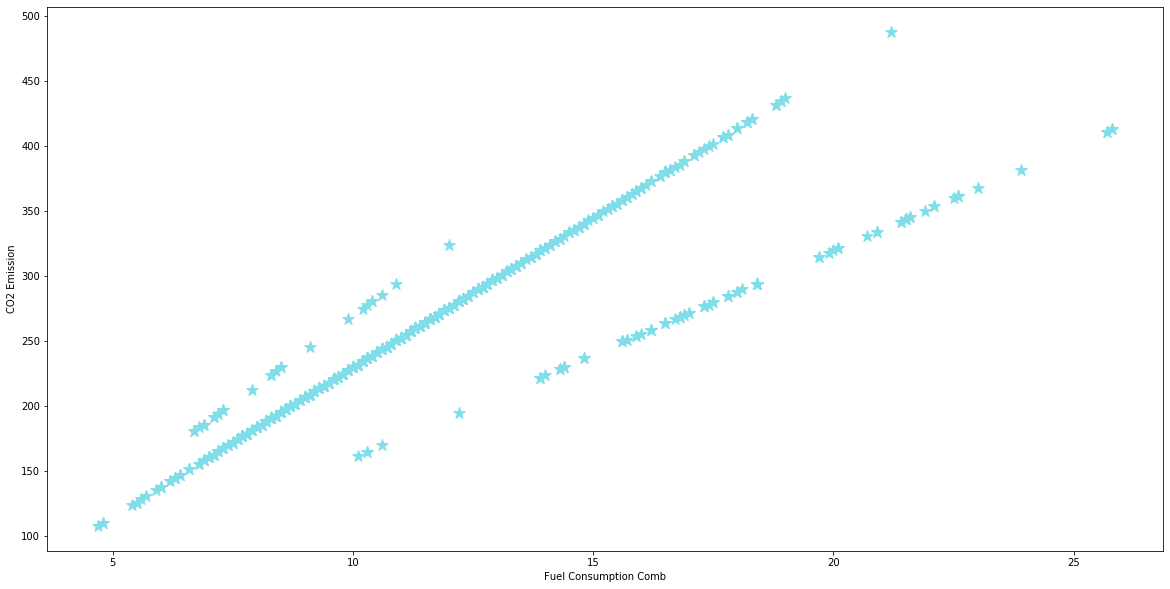

In [14]:
plt.figure(figsize=(20,10))
plt.scatter(rdf.FUELCONSUMPTION_COMB, rdf.CO2EMISSIONS,  color='#80DEEA',  marker='*', s=150)
plt.xlabel("Fuel Consumption Comb")
plt.ylabel("CO2 Emission")
plt.show()

### 4) Fuel Consumption in City VS CO2 Emission

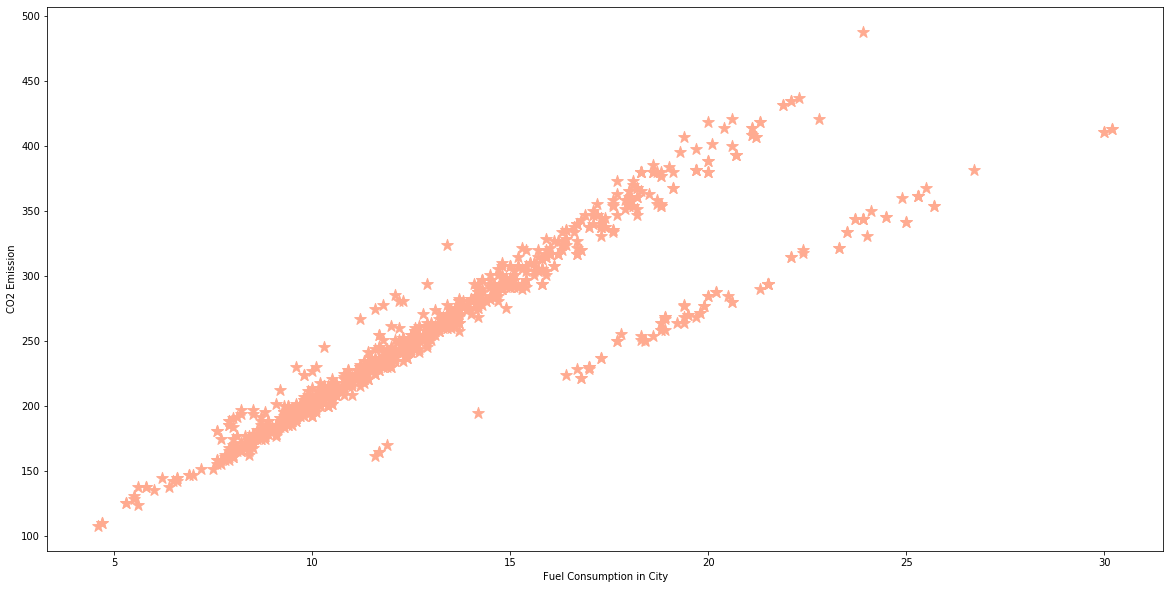

In [15]:
plt.figure(figsize=(20,10))
plt.scatter(rdf.FUELCONSUMPTION_CITY, rdf.CO2EMISSIONS,  color='#FFAB91',  marker='*', s=150)
plt.xlabel("Fuel Consumption in City")
plt.ylabel("CO2 Emission")
plt.show()

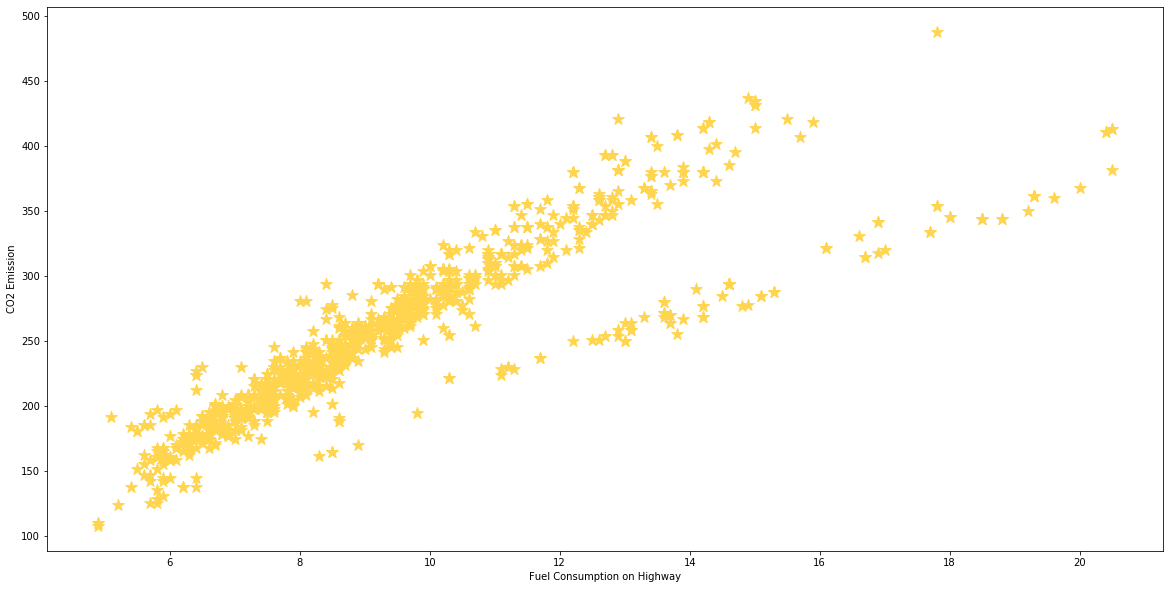

In [16]:
plt.figure(figsize=(20,10))
plt.scatter(rdf.FUELCONSUMPTION_HWY, rdf.CO2EMISSIONS,  color='#FFD54F',  marker='*', s=150)
plt.xlabel("Fuel Consumption on Highway")
plt.ylabel("CO2 Emission")
plt.show()

# SIMPLE REGRESSION MODEL 1
## 1) ENGINE SIZE AND CO2 EMISSION

### Spliting the data
Here, 80% data is used for training and 20% data for testing.

In [17]:
split = np.random.rand(len(data)) < 0.8
train = rdf[split]
test = rdf[~split]

### Training the data distribution

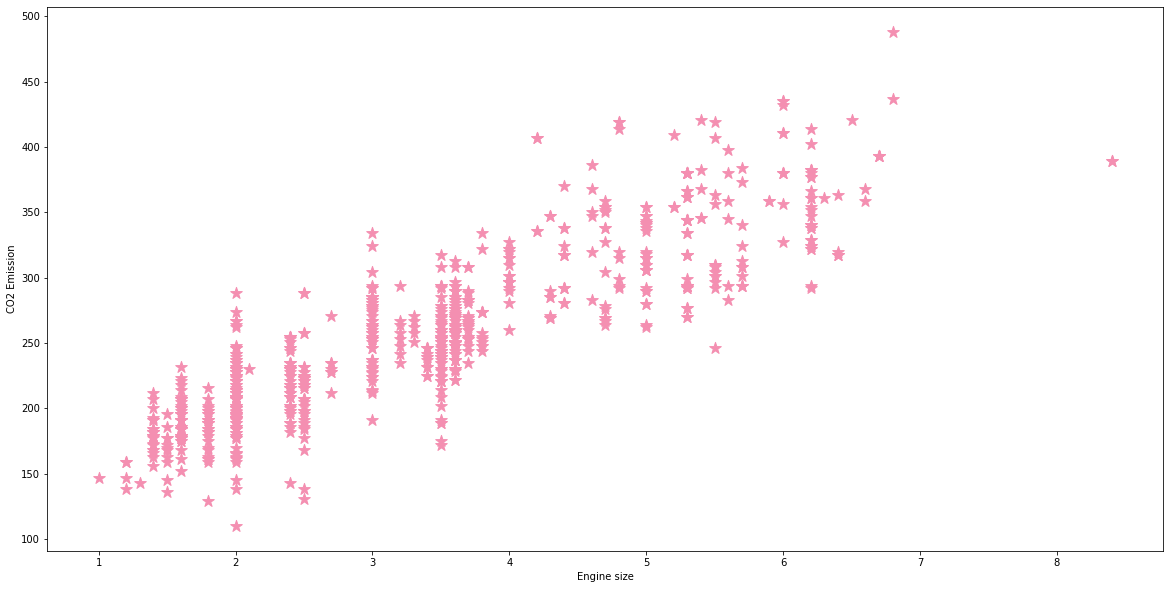

In [18]:
plt.figure(figsize=(20,10))
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='#F48FB1', marker='*', s = 150)
plt.xlabel("Engine size")
plt.ylabel("CO2 Emission")
plt.show()

### Data Modeling

In [19]:
reg1 = linear_model.LinearRegression()
train_x1 = np.asanyarray(train[['ENGINESIZE']])
train_y1 = np.asanyarray(train[['CO2EMISSIONS']])
reg1.fit (train_x1, train_y1)

# The coefficients
print ('Coefficient: ', reg1.coef_)
print ('Intercept: ',reg1.intercept_)

Coefficient:  [[38.46362212]]
Intercept:  [127.54969568]


### Plotting fit line over the data

Text(0, 0.5, 'CO2 Emission')

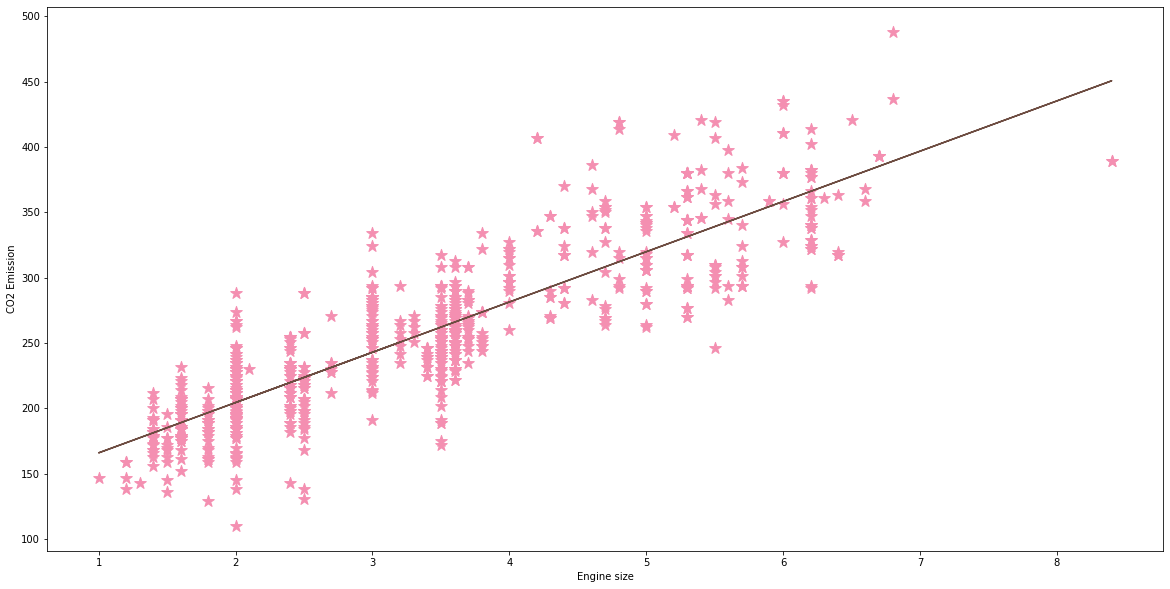

In [20]:
plt.figure(figsize=(20,10))
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='#F48FB1', marker='*', s = 150)
plt.plot(train_x1, reg1.coef_[0][0]*train_x1 + reg1.intercept_[0], '#6D4C41')
plt.xlabel("Engine size")
plt.ylabel("CO2 Emission")

### Testing the data

In [21]:

test_x1 = np.asanyarray(test[['ENGINESIZE']])
test_y1 = np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat1 = reg1.predict(test_x1)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat1 - test_y1)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat1 - test_y1) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat1 , test_y1))

Mean absolute error: 23.86
Residual sum of squares (MSE): 1025.79
R2-score: 0.62


### Calculating the accuracy of the regression model

In [22]:
regr = LinearRegression() 
regr.fit(train_x1, train_y1) 
sc1 = regr.score(test_x1, test_y1)*100
print("Engine Size VS CO2 Emission")
print("Accuracy for Simple Linear Regression Model 1 :",round(sc1,2),"%")

Engine Size VS CO2 Emission
Accuracy for Simple Linear Regression Model 1 : 75.5 %


# SIMPLE REGRESSION MODEL 2
## 2) CYLINDERS AND CO2 EMISSION

### Training the data distribution

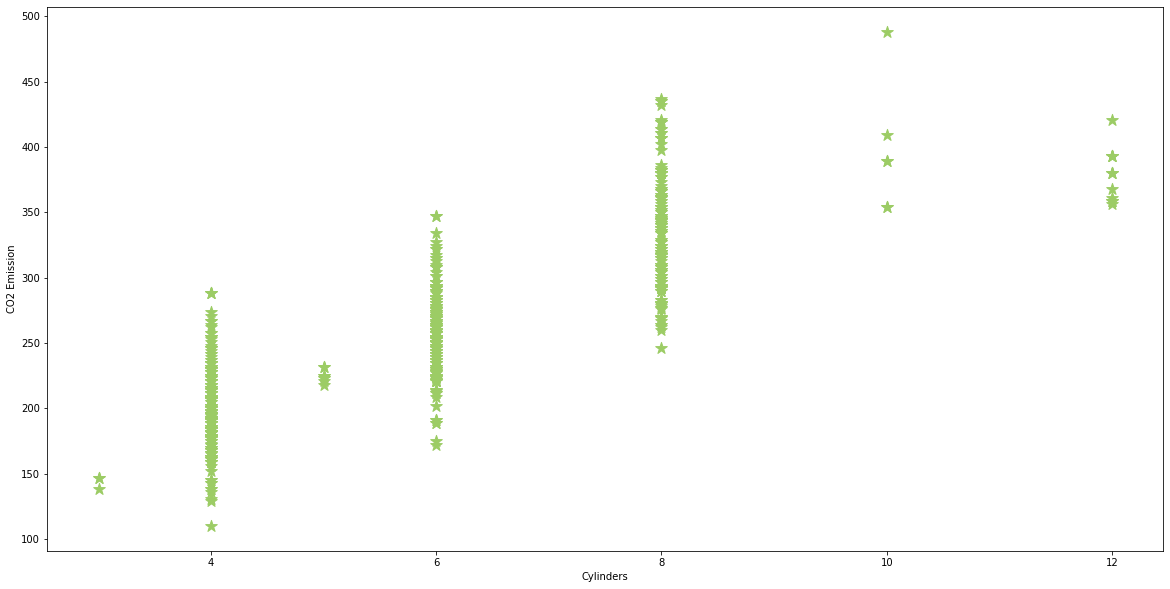

In [23]:
plt.figure(figsize=(20,10))
plt.scatter(train.CYLINDERS, train.CO2EMISSIONS,  color='#9CCC65', marker='*', s = 150)
plt.xlabel("Cylinders")
plt.ylabel("CO2 Emission")
plt.show()

### Data Modeling


In [24]:
reg2 = linear_model.LinearRegression()
train_x2 = np.asanyarray(train[['CYLINDERS']])
train_y2 = np.asanyarray(train[['CO2EMISSIONS']])
reg2.fit (train_x2, train_y2)

# The coefficients
print ('Coefficient: ', reg2.coef_)
print ('Intercept: ',reg2.intercept_)

Coefficient:  [[30.00316688]]
Intercept:  [82.33291534]


### Plotting fit line over the data

Text(0, 0.5, 'CO2 Emission')

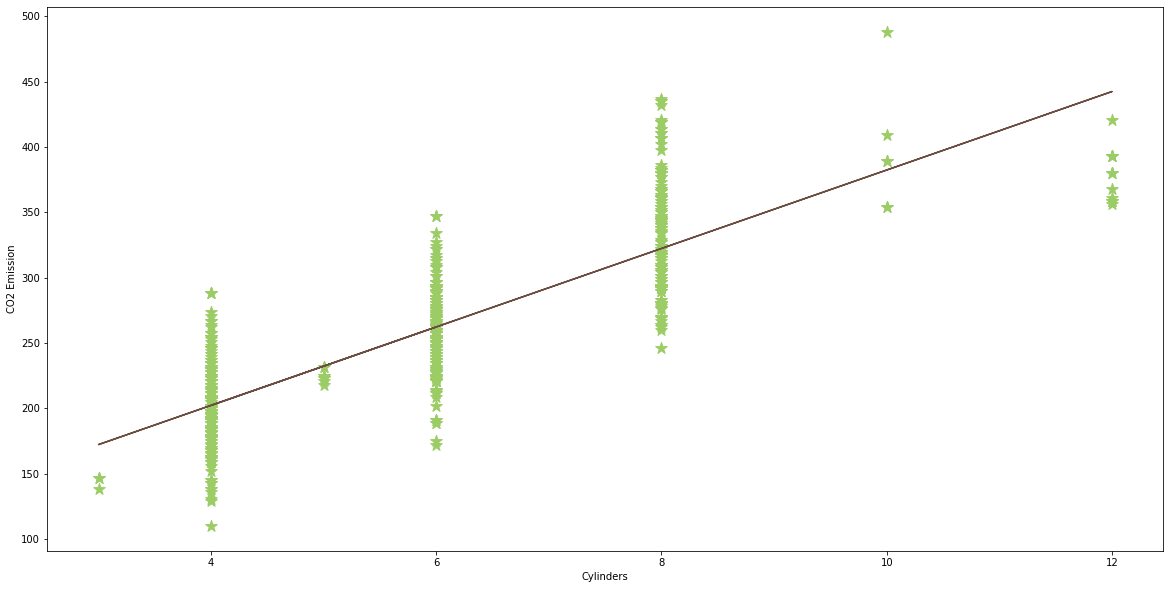

In [25]:
plt.figure(figsize=(20,10))
plt.scatter(train.CYLINDERS, train.CO2EMISSIONS,  color='#9CCC65', marker='*', s = 150)
plt.plot(train_x2, reg2.coef_[0][0]*train_x2 + reg2.intercept_[0], '#6D4C41')
plt.xlabel("Cylinders")
plt.ylabel("CO2 Emission")

### Testing the data

In [26]:

test_x2 = np.asanyarray(test[['CYLINDERS']])
test_y2 = np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat2 = reg2.predict(test_x2)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat2 - test_y2)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat2 - test_y2) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat2 , test_y2))

Mean absolute error: 26.80
Residual sum of squares (MSE): 1215.94
R2-score: 0.60


### Calculating the accuracy of the regression model

In [27]:
#regr = LinearRegression() 
regr.fit(train_x2, train_y2) 
sc2 = regr.score(test_x2, test_y2)*100
print("Cylinders VS CO2 Emission")
print("Accuracy for Simple Linear Regression Model 2 :",round(sc2,2),"%")

Cylinders VS CO2 Emission
Accuracy for Simple Linear Regression Model 2 : 70.96 %


# SIMPLE REGRESSION MODEL 3
## 3) FUEL CONSUMPTION COMB AND CO2 EMISSION

### Training the data distribution

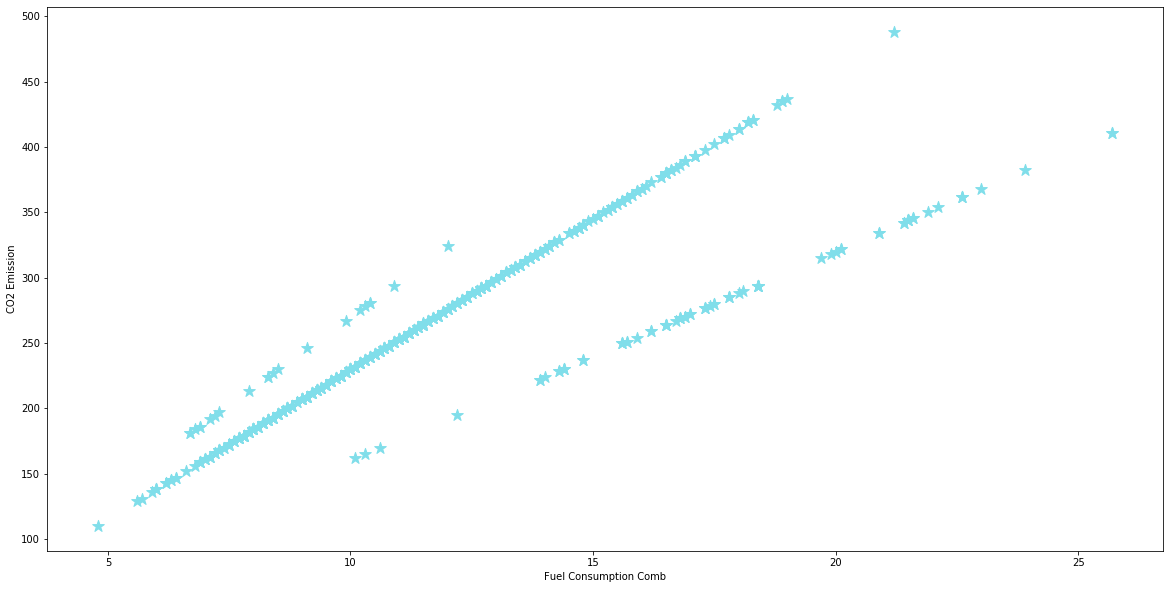

In [28]:
plt.figure(figsize=(20,10))
plt.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS,  color='#80DEEA', marker='*', s = 150)
plt.xlabel("Fuel Consumption Comb")
plt.ylabel("CO2 Emission")
plt.show()

### Data Modeling

In [29]:
reg3 = linear_model.LinearRegression()
train_x3 = np.asanyarray(train[['FUELCONSUMPTION_COMB']])
train_y3 = np.asanyarray(train[['CO2EMISSIONS']])
reg3.fit (train_x3, train_y3)

# The coefficients
print ('Coefficient: ', reg3.coef_)
print ('Intercept: ',reg3.intercept_)

Coefficient:  [[16.11570126]]
Intercept:  [69.15212167]


### Plotting fit line over the data

Text(0, 0.5, 'CO2 Emission')

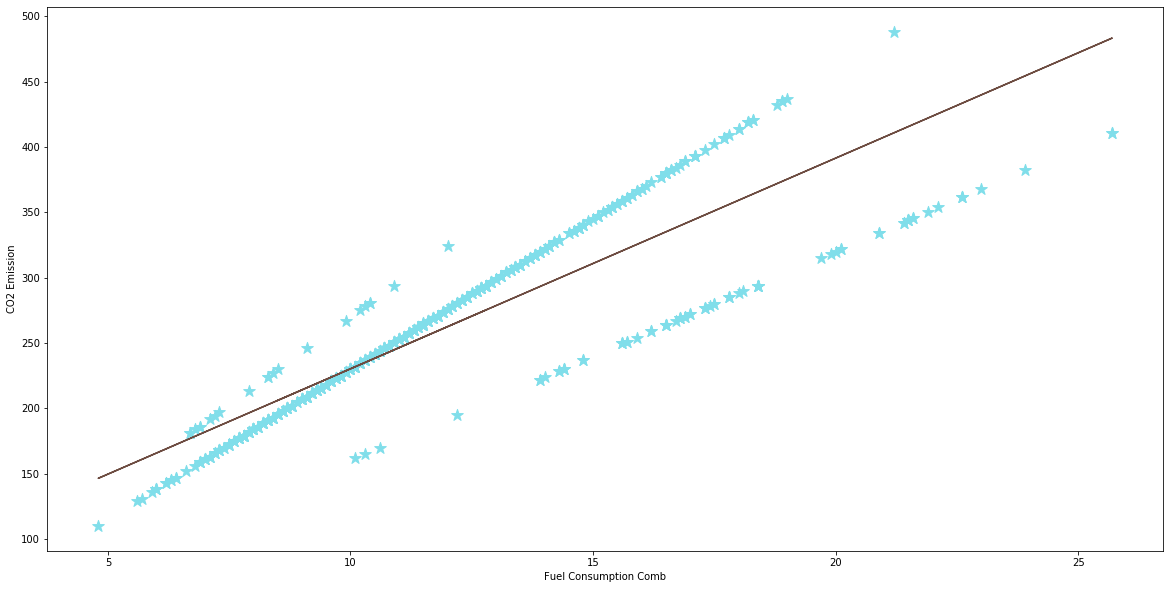

In [30]:
plt.figure(figsize=(20,10))
plt.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS,  color='#80DEEA', marker='*', s = 150)
plt.plot(train_x3, reg3.coef_[0][0]*train_x3 + reg3.intercept_[0], '#6D4C41')
plt.xlabel("Fuel Consumption Comb")
plt.ylabel("CO2 Emission")

### Testing the data

In [31]:

test_x3 = np.asanyarray(test[['FUELCONSUMPTION_COMB']])
test_y3 = np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat3 = reg3.predict(test_x3)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat3 - test_y3)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat3 - test_y3) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat3 , test_y3))

Mean absolute error: 19.55
Residual sum of squares (MSE): 714.27
R2-score: 0.78


### Calculating the accuracy of the regression model

In [32]:
#regr = LinearRegression() 
regr.fit(train_x3, train_y3) 
sc3 = regr.score(test_x3, test_y3)*100
print("Fuel Consumption Comb VS CO2 Emission")
print("Accuracy for Simple Linear Regression Model 3 :",round(sc3,2),"%")

Fuel Consumption Comb VS CO2 Emission
Accuracy for Simple Linear Regression Model 3 : 82.94 %


### 4) Fuel Consumption in City VS CO2 Emission

### Training the data distribution

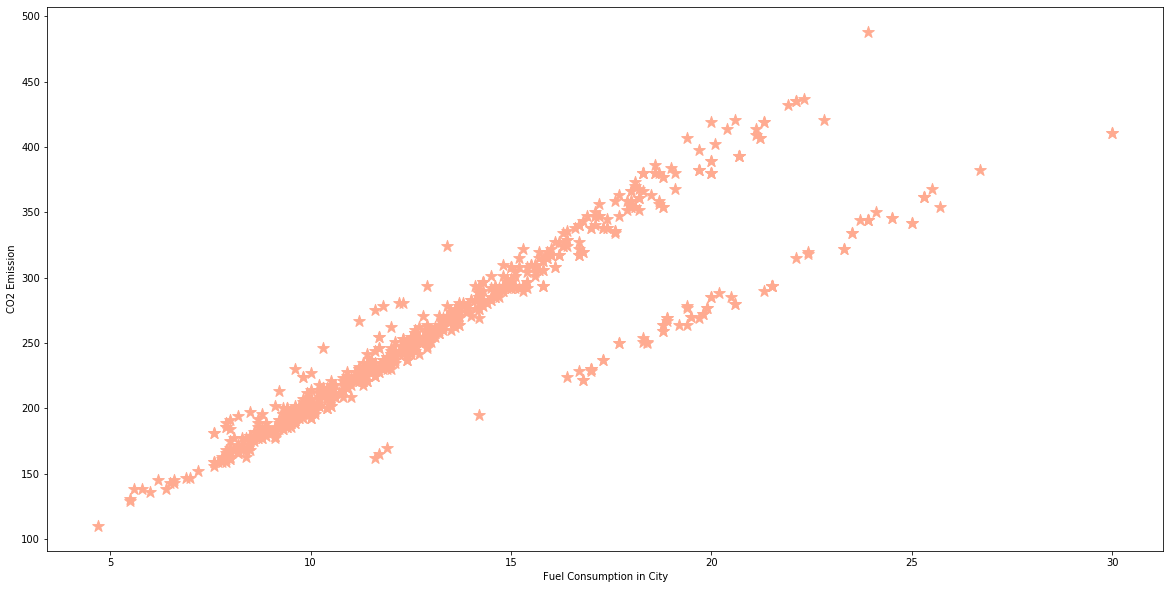

In [33]:
plt.figure(figsize=(20,10))
plt.scatter(train.FUELCONSUMPTION_CITY, train.CO2EMISSIONS,  color='#FFAB91', marker='*', s = 150)
plt.xlabel("Fuel Consumption in City")
plt.ylabel("CO2 Emission")
plt.show()

### Data Modeling

In [34]:
reg4 = linear_model.LinearRegression()
train_x4 = np.asanyarray(train[['FUELCONSUMPTION_CITY']])
train_y4 = np.asanyarray(train[['CO2EMISSIONS']])
reg4.fit (train_x4, train_y4)

# The coefficients
print ('Coefficient: ', reg4.coef_)
print ('Intercept: ',reg4.intercept_)

Coefficient:  [[13.79671322]]
Intercept:  [72.31388565]


### Plotting fit line over the data

Text(0, 0.5, 'CO2 Emission')

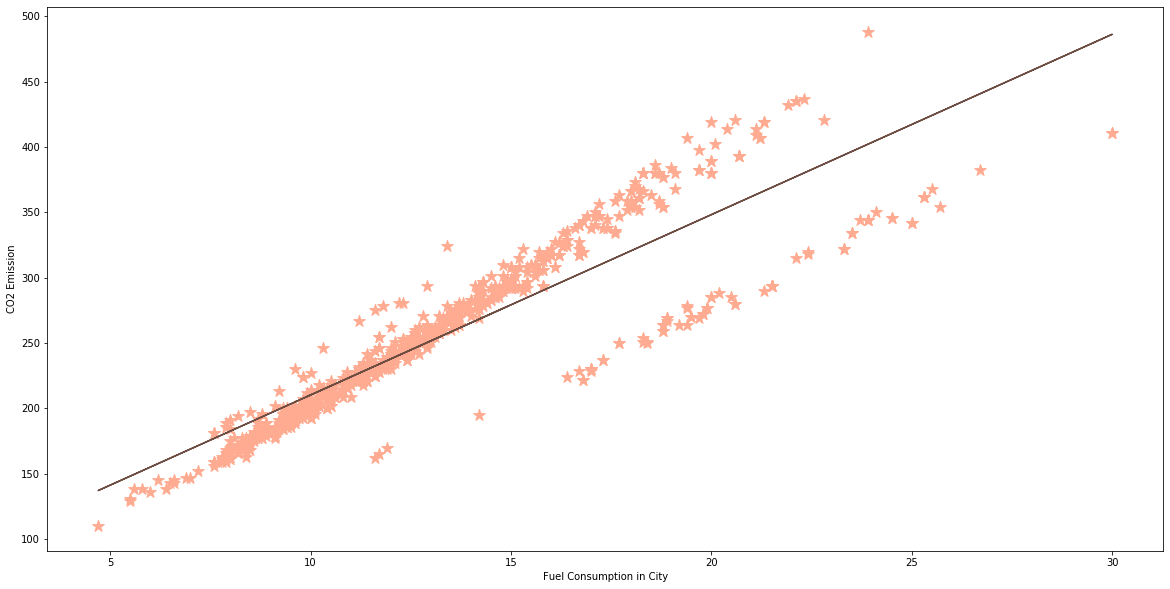

In [35]:
plt.figure(figsize=(20,10))
plt.scatter(train.FUELCONSUMPTION_CITY, train.CO2EMISSIONS,  color='#FFAB91', marker='*', s = 150)
plt.plot(train_x4, reg4.coef_[0][0]*train_x4 + reg4.intercept_[0], '#6D4C41')
plt.xlabel("Fuel Consumption in City")
plt.ylabel("CO2 Emission")

### Testing the data


In [36]:

test_x4 = np.asanyarray(test[['FUELCONSUMPTION_CITY']])
test_y4 = np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat4 = reg4.predict(test_x4)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat4 - test_y4)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat4 - test_y4) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat4 , test_y4))

Mean absolute error: 18.51
Residual sum of squares (MSE): 661.82
R2-score: 0.80


### Calculating the accuracy of the regression model

In [37]:
#regr = LinearRegression() 
regr.fit(train_x4, train_y4) 
sc4 = regr.score(test_x4, test_y4)*100
print("Fuel Consumption in City VS CO2 Emission")
print("Accuracy for Simple Linear Regression Model 4 :",round(sc4,2),"%")

Fuel Consumption in City VS CO2 Emission
Accuracy for Simple Linear Regression Model 4 : 84.19 %


### 5) Fuel Consumption on Highway VS CO2 Emission

### Training the data distribution

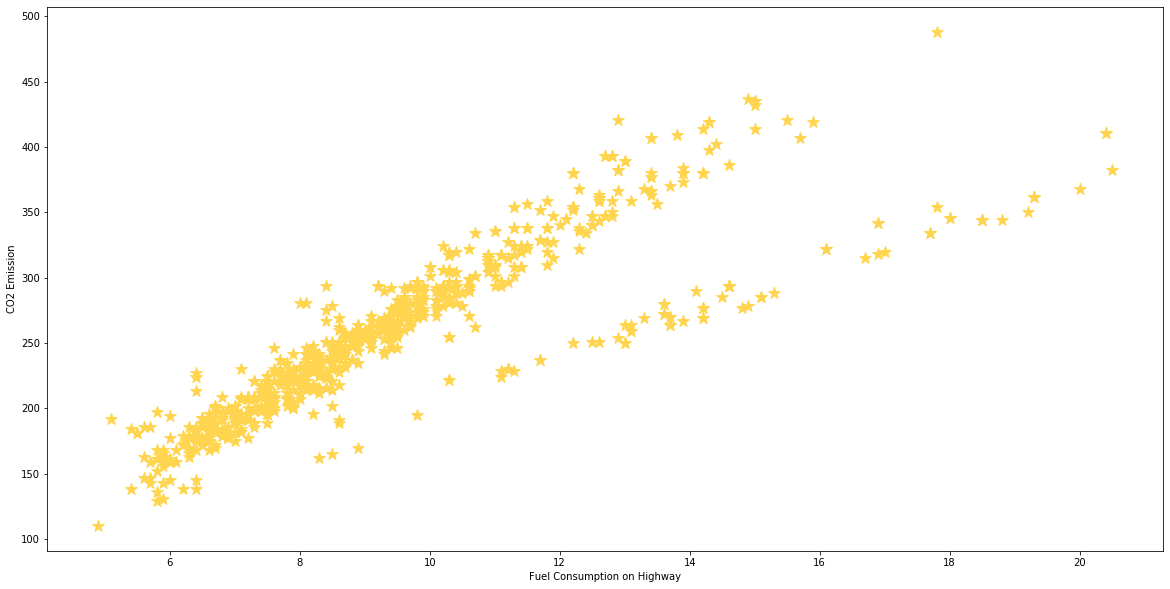

In [38]:
plt.figure(figsize=(20,10))
plt.scatter(train.FUELCONSUMPTION_HWY, train.CO2EMISSIONS,  color='#FFD54F', marker='*', s = 150)
plt.xlabel("Fuel Consumption on Highway")
plt.ylabel("CO2 Emission")
plt.show()

### Data Modeling

In [39]:
reg5 = linear_model.LinearRegression()
train_x5 = np.asanyarray(train[['FUELCONSUMPTION_HWY']])
train_y5 = np.asanyarray(train[['CO2EMISSIONS']])
reg5.fit (train_x5, train_y5)

# The coefficients
print ('Coefficient: ', reg5.coef_)
print ('Intercept: ',reg5.intercept_)

Coefficient:  [[19.40493348]]
Intercept:  [71.99164474]


### Plotting fit line over the data

Text(0, 0.5, 'CO2 Emission')

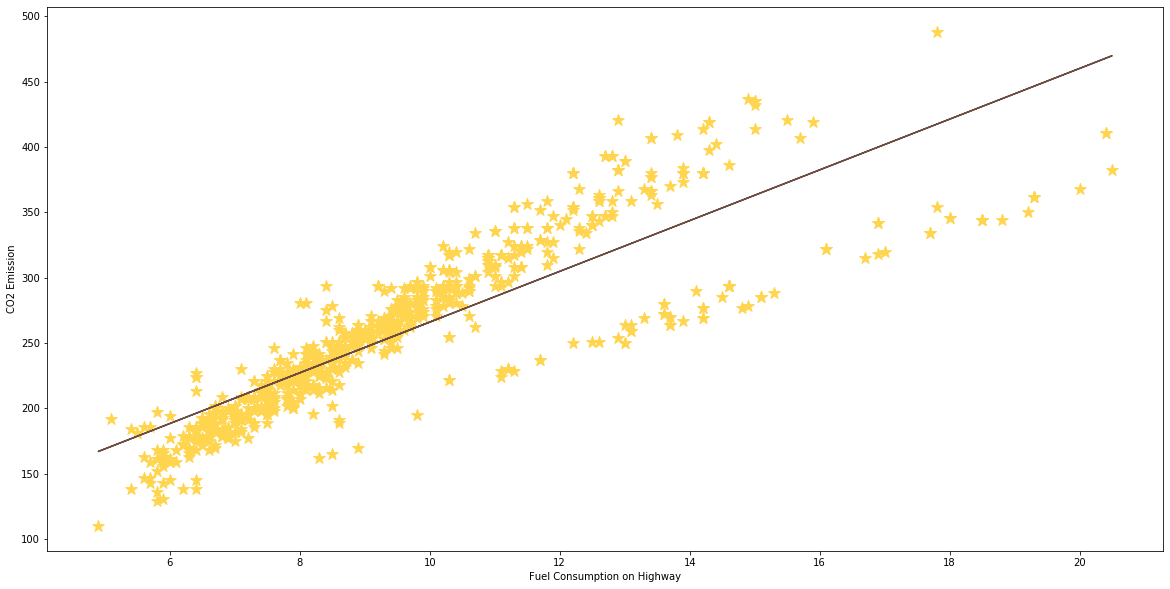

In [40]:
plt.figure(figsize=(20,10))
plt.scatter(train.FUELCONSUMPTION_HWY, train.CO2EMISSIONS,  color='#FFD54F', marker='*', s = 150)
plt.plot(train_x5, reg5.coef_[0][0]*train_x5 + reg5.intercept_[0], '#6D4C41')
plt.xlabel("Fuel Consumption on Highway")
plt.ylabel("CO2 Emission")

### Testing the data


In [41]:

test_x5 = np.asanyarray(test[['FUELCONSUMPTION_COMB']])
test_y5 = np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat5 = reg5.predict(test_x5)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat5 - test_y5)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat5 - test_y5) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat5 , test_y5))

Mean absolute error: 38.73
Residual sum of squares (MSE): 2301.99
R2-score: 0.52


### Calculating the accuracy of the regression model

In [42]:
#regr = LinearRegression() 
regr.fit(train_x5, train_y5) 
sc5 = regr.score(test_x5, test_y5)*100
print("Fuel Consumption Comb VS CO2 Emission")
print("Accuracy for Simple Linear Regression Model 5 :",round(sc5,2),"%")

Fuel Consumption Comb VS CO2 Emission
Accuracy for Simple Linear Regression Model 5 : 45.01 %


## Evaluating best simple linear regression model

In [43]:
mx = max(sc1, sc2, sc3, sc4, sc5)

if(mx == sc1):
    print("According to the evaluation above, Engine Size Comb VS CO2 Emission is the best simple linear regression model with accuracy ",round(sc1,2),"%")
elif(mx == sc2):
    print("According to the evaluation above, Cylinders VS CO2 Emission is the best simple linear regression model with accuracy ",round(sc2,2),"%")
elif(mx == sc3):
    print("According to the evaluation above, Fuel Consumption Comb VS CO2 Emission is the best simple linear regression model with accuracy ",round(sc3,2),"%")
elif(mx == sc4):
    print("According to the evaluation above, Fuel Consumption in City VS CO2 Emission is the best simple linear regression model with accuracy ",round(sc4,2),"%")
elif(mx == sc5):
    print("According to the evaluation above, Fuel Consumption on Highway VS CO2 Emission is the best simple linear regression model with accuracy ",round(sc,2),"%")

According to the evaluation above, Fuel Consumption in City VS CO2 Emission is the best simple linear regression model with accuracy  84.19 %


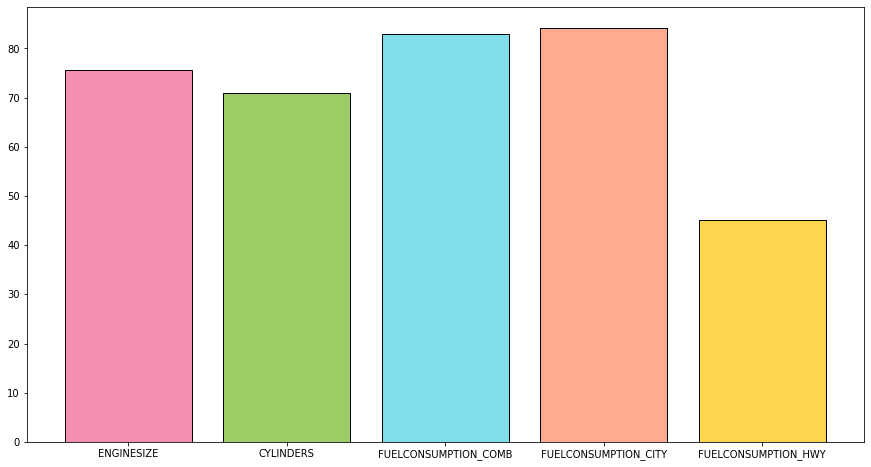

In [44]:
plt.figure(figsize=(15,8))
a = [sc1, sc2, sc3, sc4, sc5]
b = np.arange(len(a))
names = ['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY' ]
plt.bar(b,a, color = ['#F48FB1', '#9CCC65', '#80DEEA', '#FFAB91', '#FFD54F'], edgecolor='black')
plt.xticks(b,names)

plt.show()